### 10.1 GroupBy Mechanics

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                    'data2' : np.random.randn(5)})

In [4]:
df

,key1,key2,data1,data2
0,a,one,-0.253472,1.003457
1,a,two,-0.131128,-0.458918
2,b,one,1.227140,0.261055
3,b,two,0.127580,0.225238
4,a,one,-1.167559,-0.339216


In [5]:
# 你想要按key1进行分组，并计算data1列的平均值
grouped = df['data1'].groupby(df['key1'])

In [6]:
grouped

In [7]:
grouped.mean()

key1
a   -0.517386
b    0.677360
Name: data1, dtype: float64

In [8]:
# 一次传入多个数组的列表，就会得到不同的结果
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.710515
      two    -0.131128
b     one     1.227140
      two     0.127580
Name: data1, dtype: float64

In [9]:
means.unstack() # 层次化索引

key2,one,two
key1,,
a,-0.710515,-0.131128
b,1.227140,0.127580


In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -0.131128
            2006    1.227140
Ohio        2005   -0.062946
            2006   -1.167559
Name: data1, dtype: float64

In [11]:
#将列名做分组键
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.517386,0.068441
b,0.677360,0.243146


In [12]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

#### Iterating Over Groups（对分组进行迭代）

In [13]:
#groupby进行迭代
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.253472  1.003457
1    a  two -0.131128 -0.458918
4    a  one -1.167559 -0.339216
b
  key1 key2    data1     data2
2    b  one  1.22714  0.261055
3    b  two  0.12758  0.225238


In [14]:
# 多重key迭代，返回由key组成的tuple
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.253472  1.003457
4    a  one -1.167559 -0.339216
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.131128 -0.458918
('b', 'one')
  key1 key2    data1     data2
2    b  one  1.22714  0.261055
('b', 'two')
  key1 key2    data1     data2
3    b  two  0.12758  0.225238


In [15]:
#对数据片段进行操作：将数据片段做成dict
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,1.22714,0.261055
3,b,two,0.12758,0.225238


In [16]:
# 根据dtype对列进行分组
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [17]:
#对其他轴进行分组
grouped = df.groupby(df.dtypes, axis = 1)

In [18]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.253472  1.003457
1 -0.131128 -0.458918
2  1.227140  0.261055
3  0.127580  0.225238
4 -1.167559 -0.339216
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


#### Selecting a Column or Subset of Columns (选取一列或列的子集)

 对于由DataFrame产生的GroupBy对象，如果用一个（单个字符串）或一组（字符串数组）列名对其进行索引，就能实现选取部分列进行聚合的目的。也就是说：

In [19]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [20]:
#等价于
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [21]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [22]:
s_grouped.mean()

key1  key2
a     one     0.332120
      two    -0.458918
b     one     0.261055
      two     0.225238
Name: data2, dtype: float64

#### Grouping with Dicts and Series（通过dict和series分组）

In [23]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [24]:
people.iloc[2:3, [1, 2]] = np.nan

In [25]:
people

,a,b,c,d,e
Joe,0.209127,1.323090,-0.533965,0.755324,-1.291282
Steve,-2.202673,-1.020749,-0.007684,0.402773,0.695989
Wes,0.179585,NaN,NaN,0.997550,-0.000073
Jim,-0.000480,0.676158,0.146063,1.173685,-0.519781
Travis,-0.723667,0.304804,0.142651,0.102896,-0.121783


假设已知列的分组关系，并希望根据分组计算列的和: 

In [26]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
            'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [27]:
by_column = people.groupby(mapping, axis=1) #尽管f没有在column中，但依然可以实现

In [28]:
by_column.sum()

,blue,red
Joe,0.221359,0.240935
Steve,0.395089,-2.527433
Wes,0.997550,0.179511
Jim,1.319748,0.155897
Travis,0.245547,-0.540646


In [29]:
map_series = pd.Series(mapping)

In [30]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [31]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


#### Grouping with Functions（通过函数进行分组）

In [32]:
people.groupby(len).sum() # 根据字符长度统计

,a,b,c,d,e
3,0.388231,1.999248,-0.387902,2.926558,-1.811136
5,-2.202673,-1.020749,-0.007684,0.402773,0.695989
6,-0.723667,0.304804,0.142651,0.102896,-0.121783


In [33]:
# 函数跟数组、列表、字典、Series混合使用，所有数据都转换为arrays
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.179585  1.323090 -0.533965  0.755324 -1.291282
  two -0.000480  0.676158  0.146063  1.173685 -0.519781
5 one -2.202673 -1.020749 -0.007684  0.402773  0.695989
6 two -0.723667  0.304804  0.142651  0.102896 -0.121783

#### Grouping with Index Levels（通过索引级别分组）

In [34]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                     names=['cty', 'tenor'])

In [35]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns = columns)

In [36]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.016048  0.151736  0.597706  0.070960  0.598367
1     -0.916094 -0.429788 -0.212140  0.027902 -0.178171
2     -1.536498  0.248273 -1.527778  0.698278  1.587477
3      0.605755  0.463263 -0.599345 -1.103178  0.873696

In [37]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### 10.2 Data Aggregation（数据整合）

groupby方法

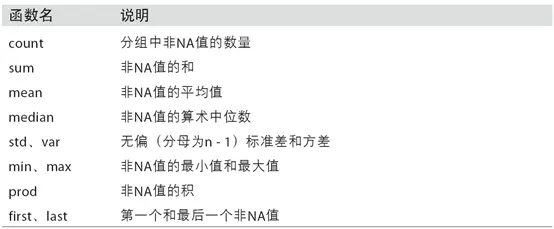

In [38]:
df

,key1,key2,data1,data2
0,a,one,-0.253472,1.003457
1,a,two,-0.131128,-0.458918
2,b,one,1.227140,0.261055
3,b,two,0.127580,0.225238
4,a,one,-1.167559,-0.339216


In [39]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9) #计算df样本分数

key1
a   -0.155597
b    1.117184
Name: data1, dtype: float64

In [40]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak) # 使用自己的aggregate function（聚合函数）

,data1,data2
key1,,
a,1.036431,1.462375
b,1.099559,0.035817


In [41]:
# 有些方法（如describe）也是可以用在这里的，即使严格来讲，它们并非聚合运算：
grouped.describe()

data1                                                             \
     count      mean       std       min       25%       50%      75%   
key1                                                                    
a      3.0 -0.517386  0.566379 -1.167559 -0.710515 -0.253472 -0.19230   
b      2.0  0.677360  0.777506  0.127580  0.402470  0.677360  0.95225   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a    -0.131128   3.0  0.068441  0.811956 -0.458918 -0.399067 -0.339216   
b     1.227140   2.0  0.243146  0.025327  0.225238  0.234192  0.243146   

                          
           75%       max  
key1                      
a     0.332120  1.003457  
b     0.252101  0.261055

#### Column-Wise and Multiple Function Application（面向列的多函数应用）

In [42]:
tips = pd.read_csv('Course_Material/examples/tips.csv') # 调用csv文件

In [43]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # 加入百分比
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [44]:
grouped = tips.groupby(['day', 'smoker'])
grouped

In [45]:
group_pct = grouped['tip_pct']
group_pct.agg('mean') # 使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [46]:
group_pct.agg(['mean', 'std', peak_to_peak]) #传递多个函数

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [47]:
# 传入由(name,function)元组组成的列表
group_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [48]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions) # 定义一组应用于全部列的一组函数
result

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [49]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [50]:
# 带有自定义名称的一组元组
ftuples = [('Durchschnitt', 'mean'),('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [51]:
grouped.agg({'tip' : np.max, 'size' : 'sum'}) # 对一个列或不同的列应用不同的函数

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [52]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

#### Returning Aggregated Data Without Row Indexes（以“没有行索引”的形式返回聚合数据）

向groupby传入as_index=False禁用唯一的分组键组成的索引

In [53]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [54]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


### 10.3 Apply: General split-apply-combine (apply: 一般性的“拆分－应用－合并”)

In [55]:
def top(df, n=5, column='tip_pct'): # 编写函数，根据分组选出最高的5个tip_pct值
    return df.sort_values(by=column)[-n:]

In [56]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [57]:
tips.groupby('smoker').apply(top) # 一个层次化索引

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

apply的函数能够接受其他参数或关键字，将这些内容放在函数名后面一并传入：

In [58]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [59]:
# 在GroupBy对象上调用过describe：
result = tips.groupby('smoker')['tip_pct'].describe()

In [60]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [61]:
result.unstack()

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [62]:
# 用apply()达到同样效果
f = lambda x: x.describe()
grouped.apply(f)

total_bill       tip  size   tip_pct
day  smoker                                            
Fri  No     count    4.000000  4.000000  4.00  4.000000
            mean    18.420000  2.812500  2.25  0.151650
            std      5.059282  0.898494  0.50  0.028123
            min     12.460000  1.500000  2.00  0.120385
            25%     15.100000  2.625000  2.00  0.137239
...                       ...       ...   ...       ...
Thur Yes    min     10.340000  2.000000  2.00  0.090014
            25%     13.510000  2.000000  2.00  0.148038
            50%     16.470000  2.560000  2.00  0.153846
            75%     19.810000  4.000000  2.00  0.194837
            max     43.110000  5.000000  4.00  0.241255

[64 rows x 4 columns]

#### Suppressing the Group Keys（禁止分组键）

In [63]:
 tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


#### Quantile and Bucket Analysis（分位数和桶分析）

In [64]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                     'data2': np.random.randn(1000)})
quartile = pd.cut(frame.data1, 4) # 分解为4块
quartile

0      (-1.93, -0.36]
1      (-1.93, -0.36]
2      (-1.93, -0.36]
3      (-1.93, -0.36]
4        (1.21, 2.78]
            ...      
995     (-0.36, 1.21]
996     (-0.36, 1.21]
997    (-1.93, -0.36]
998     (-0.36, 1.21]
999     (-0.36, 1.21]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64]): [(-3.506, -1.93] < (-1.93, -0.36] < (-0.36, 1.21] < (1.21, 2.78]]

In [65]:
def get_stats(group):
    return{'min': group.min(), 'max': group.max(),
          'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(quartile)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.506, -1.93]",-3.127536,2.794327,32.0,0.015384
"(-1.93, -0.36]",-2.779391,3.011368,357.0,-0.065780
"(-0.36, 1.21]",-3.268077,3.596270,509.0,-0.046702
"(1.21, 2.78]",-1.762255,3.251703,102.0,0.216656


In [66]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-3.127536,2.794327,100.0,-0.054380
1,-2.610528,2.756183,100.0,-0.115112
2,-2.361021,3.011368,100.0,-0.053626
3,-2.779391,2.351274,100.0,0.011190
4,-2.665921,3.596270,100.0,0.031549
5,-2.636494,2.114244,100.0,-0.010005
6,-3.268077,2.684398,100.0,-0.025857
7,-2.667519,1.852755,100.0,-0.170857
8,-2.581962,2.416798,100.0,-0.087393


In [67]:
pd.qcut?

#### Example: Filling Missing Values with Group-Specific Values（用特定于分组的值填充缺失值）

In [68]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -1.535246
2         NaN
3    0.332498
4         NaN
5    0.677974
dtype: float64

In [69]:
s.fillna(s.mean())

0   -0.174925
1   -1.535246
2   -0.174925
3    0.332498
4   -0.174925
5    0.677974
dtype: float64

In [70]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
           'Oregon', 'Nevada', 'California', 'Idaho']

group_key = ['East'] * 4 + ['West'] * 4

data = pd.Series(np.random.randn(8), index=states)

In [74]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [75]:
data

Ohio          1.013521
New York      0.879778
Vermont            NaN
Florida       0.589627
Oregon       -0.148453
Nevada             NaN
California    0.488744
Idaho              NaN
dtype: float64

In [76]:
data.groupby(group_key).mean()

East    0.827642
West    0.170146
dtype: float64

In [77]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          1.013521
New York      0.879778
Vermont       0.827642
Florida       0.589627
Oregon       -0.148453
Nevada        0.170146
California    0.488744
Idaho         0.170146
dtype: float64

In [78]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          1.013521
New York      0.879778
Vermont       0.500000
Florida       0.589627
Oregon       -0.148453
Nevada       -1.000000
California    0.488744
Idaho        -1.000000
dtype: float64

#### Example: Random Sampling and Permutation（随机采样和排列）

In [79]:
suits = ['H', 'S', 'C', 'D'] # 四种花色
card_val = (list(range(1, 11)) + [10] * 3) * 4 # 卡片价值
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K'] # 牌面
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [83]:
deck[:6]

AH    1
2H    2
3H    3
4H    4
5H    5
6H    6
dtype: int64

In [84]:
def draw(deck, n=5): #整副牌中抽取5张
    return deck.sample(n)

draw(deck)

AD     1
7S     7
AS     1
KD    10
QC    10
dtype: int64

In [86]:
#假设每种花色取出两种
get_suit = lambda card: card[-1] # 最后一位为花色
deck.groupby(get_suit).apply(draw, n=2)

C  2C      2
   10C    10
D  7D      7
   9D      9
H  JH     10
   5H      5
S  QS     10
   KS     10
dtype: int64

In [87]:
# 也可写为：
deck.groupby(get_suit, group_keys=False).apply(draw, n=2) # 去掉花色的index

AC      1
6C      6
9D      9
KD     10
8H      8
9H      9
10S    10
3S      3
dtype: int64

#### Example: Group Weighted Average and Correlation（分组加权平均数和相关系数）

In [88]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})

In [89]:
df

,category,data,weights
0,a,0.619169,0.748364
1,a,0.247188,0.325526
2,a,-1.045563,0.818867
3,a,-1.035815,0.007000
4,b,1.087404,0.562370
5,b,-0.245971,0.251299
6,b,0.000674,0.697290
7,b,1.496688,0.617593


In [90]:
#利用category计算加权：
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights = g['weights'])
grouped.apply(get_wavg)

category
a   -0.168231
b    0.692736
dtype: float64

In [91]:
close_px = pd.read_csv('Course_Material/examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)

In [95]:
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [97]:
# 计算一个由日收益率（通过百分数变化计算）与SPX之间的年度相关系数组成的DataFrame：
spx_corr = lambda x: x.corrwith(x['SPX'])

In [98]:
# 使用pct_change计算close_px的百分比变化：
rets = close_px.pct_change().dropna()

In [99]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [100]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

#### Example: Group-Wise Linear Regression（组级别线性回归）

我可以定义下面这个regress函数（利用statsmodels计量经济学库）对各数据块执行普通最小二乘法（Ordinary Least Squares，OLS）回归：

In [101]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() #普通最小二乘法
    return result.params

In [102]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### 10.4 Pivot Tables and Cross-Tabulation（透视表和交叉表）

透视表（pivot table）是各种电子表格程序和其他数据分析软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中

In [103]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [107]:
# 聚合tip_pct和size，而且想根据time进行分组
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [109]:
# 传入margins=True添加分项小计。
# 添加标签为All的行和列，其值对应于单个等级中所有数据的分组统计：
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker',
                margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [113]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                aggfunc=len, margins=True) #使用其他的聚合函数，将其传给aggfunc

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [126]:
# 设置fill_value
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                  columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

pivot_table参数

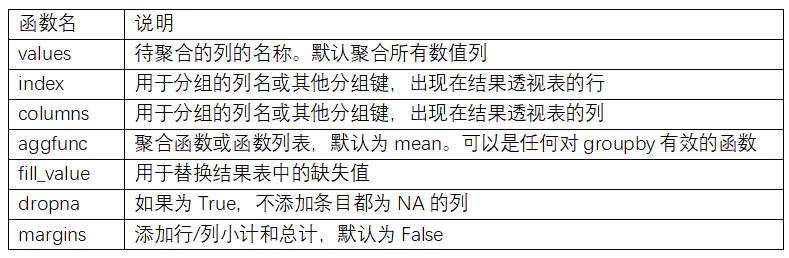

#### Cross-Tabulations: Crosstab （交叉表）

In [127]:
data

Ohio          1.013521
New York      0.879778
Vermont            NaN
Florida       0.589627
Oregon       -0.148453
Nevada             NaN
California    0.488744
Idaho              NaN
dtype: float64